https://forms.gle/dWqXkrJM1hfmPRAh6

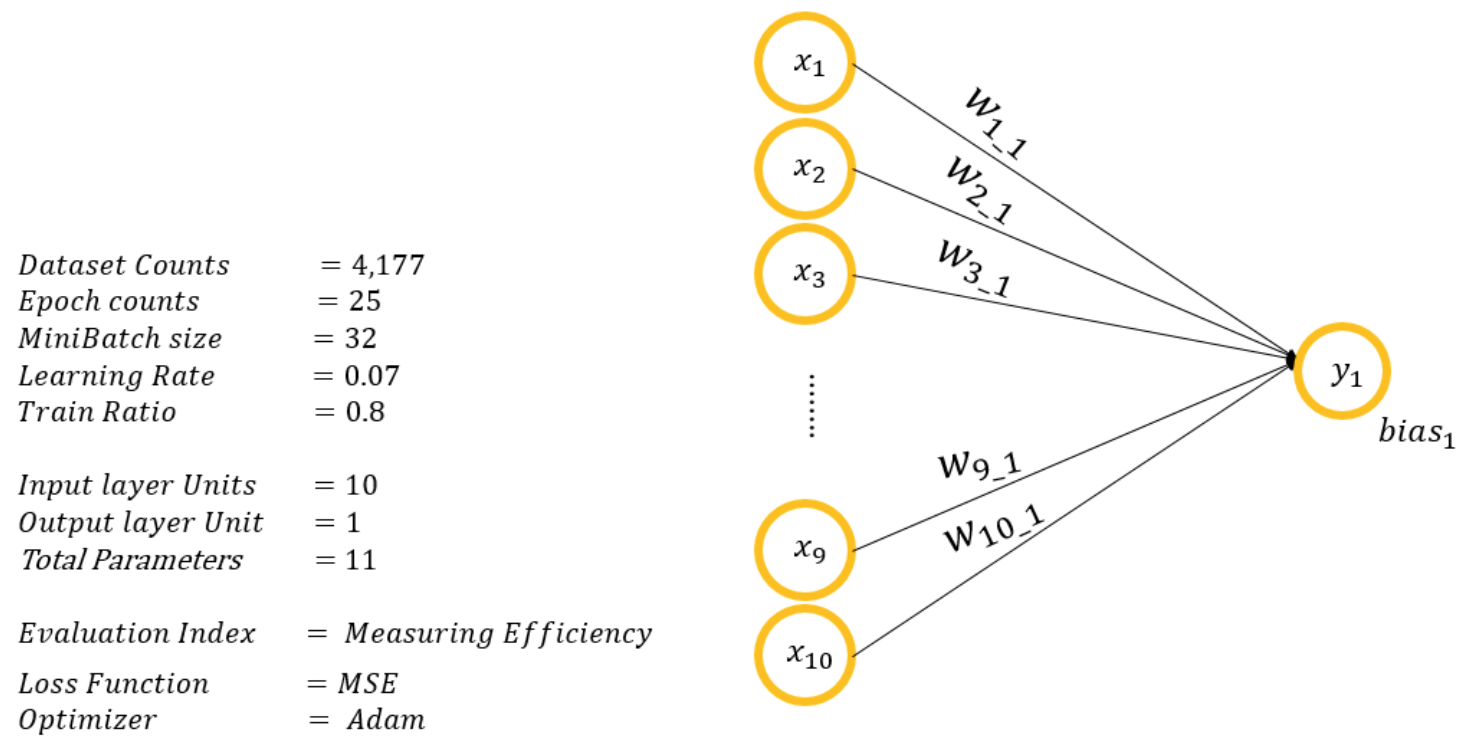

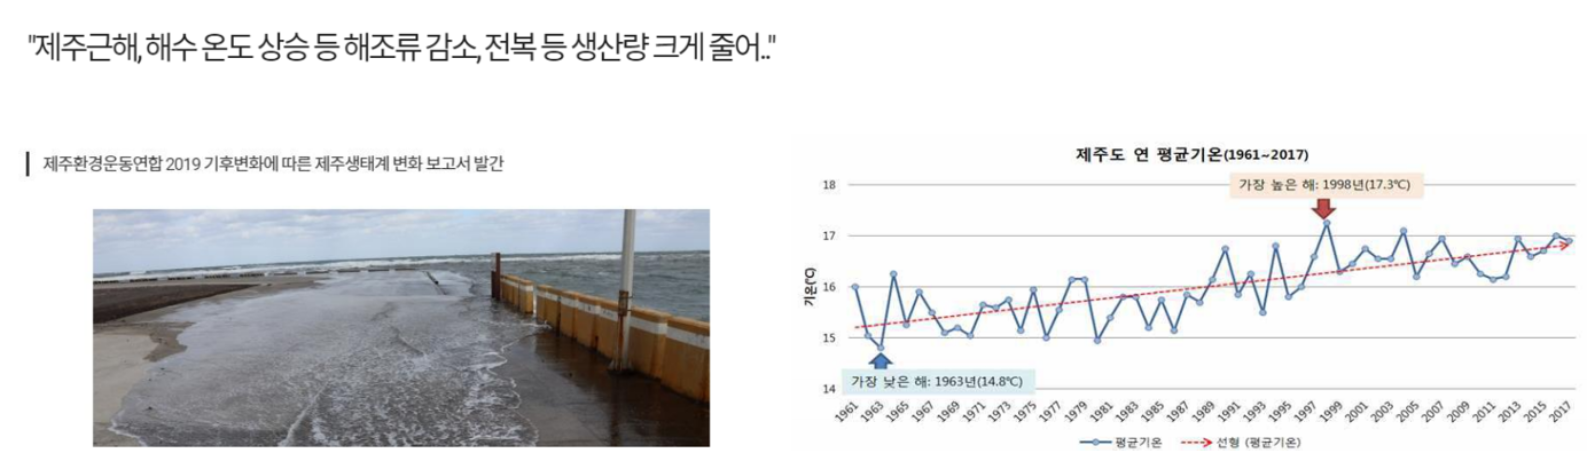

In [20]:
import pandas as pd 
import numpy as np
import csv 

In [21]:
df_abalone = pd.read_csv('abalone_mini.csv')
df_abalone.describe()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00
mean,0.412500,0.326250,0.107500,0.405875,0.165250,0.085875,0.122500,8.25
std,0.091788,0.079831,0.026615,0.229871,0.083492,0.049775,0.073087,1.50
min,0.330000,0.255000,0.080000,0.205000,0.089500,0.039500,0.055000,7.00
25%,0.345000,0.262500,0.087500,0.220375,0.097000,0.046250,0.066250,7.00
50%,0.395000,0.315000,0.107500,0.370750,0.157500,0.081250,0.112500,8.00
75%,0.462500,0.378750,0.127500,0.556250,0.225750,0.120875,0.168750,9.25
max,0.530000,0.420000,0.135000,0.677000,0.256500,0.141500,0.210000,10.00


In [22]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4 non-null      object 
 1   0.455   4 non-null      float64
 2   0.365   4 non-null      float64
 3   0.095   4 non-null      float64
 4   0.514   4 non-null      float64
 5   0.2245  4 non-null      float64
 6   0.101   4 non-null      float64
 7   0.15    4 non-null      float64
 8   15      4 non-null      int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 416.0+ bytes


# 신경망 
## 데이터 불러오기
## 파라미터 초기화 
## 데이터 분리하기( 독립 & 종속 / 학습 & 테스트 ) 
## 신경망 학습(설계)
## 순전파 -> 역전파 
## 손실함수 구현하기 
## 손실함수 미분하기 
## 신경망 연산 구현하기 
## 평가 하기
## 전체 실행 함수 

![image.png](
    
)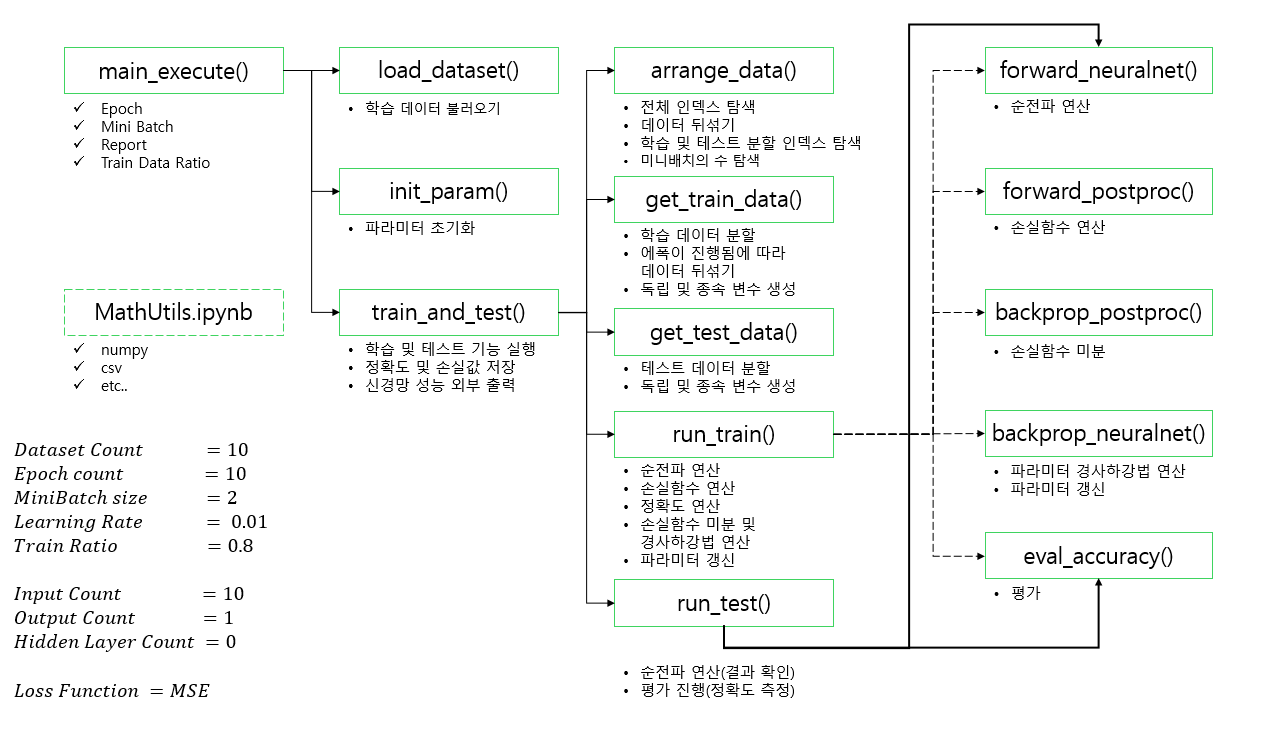

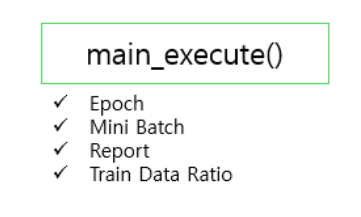

In [23]:
def main_execute(epoch_count = 10, mb_size = 2, report = 2, train_ratio = 0.8):
    load_dataset()
    weight_initial, bias_initial = init_param()
    losses_mean_row, accs_mean_row, final_acc = train_and_test(epoch_count,
                                                               mb_size, 
                                                               report, 
                                                               train_ratio)

    return weight_initial, bias_initial, losses_mean_row, accs_mean_row, final_acc

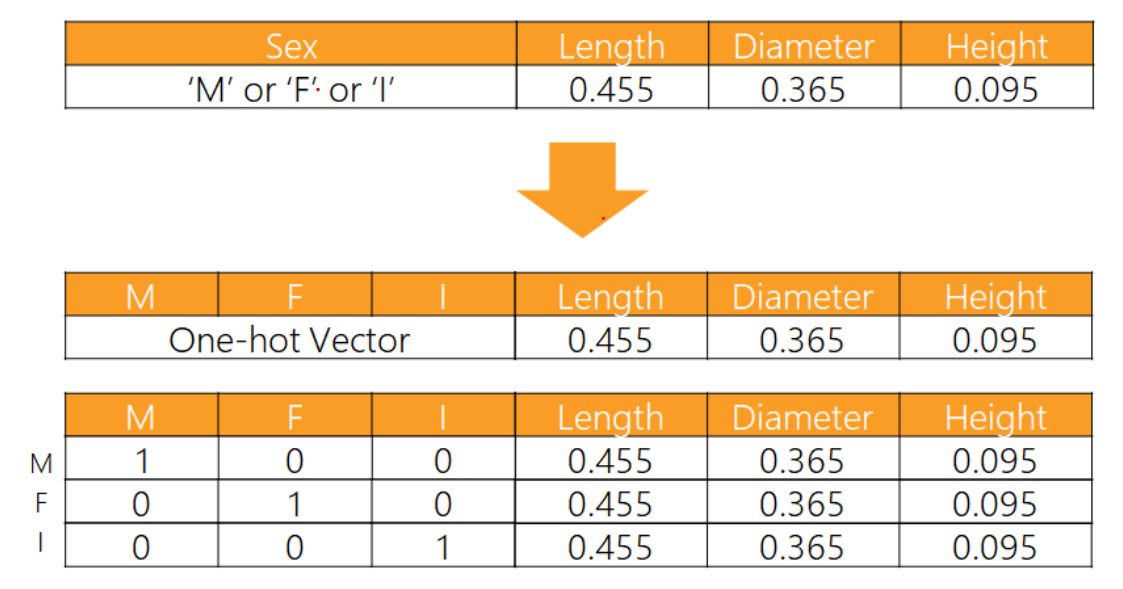

In [24]:
def load_dataset():
    with open('abalone_mini.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        rows = []
        for row in csvreader:
            rows.append(row)

    global data, input_cnt, output_cnt 
    
    input_cnt, output_cnt = 10, 1
    data = np.zeros([len(rows), input_cnt + output_cnt])

    for n, row in enumerate(rows):
        if row[0] == 'M' : data[n, 0] = 1
        if row[0] == 'F' : data[n, 1] = 1
        if row[0] == 'I' : data[n, 2] = 1
        data[n, 3 : ]= row[1:]

In [25]:
%run MathUtils.ipynb

In [26]:
load_dataset()
print(data)

[[ 1.      0.      0.      0.35    0.265   0.09    0.2255  0.0995  0.0485
   0.07    7.    ]
 [ 0.      1.      0.      0.53    0.42    0.135   0.677   0.2565  0.1415
   0.21    9.    ]
 [ 1.      0.      0.      0.44    0.365   0.125   0.516   0.2155  0.114
   0.155  10.    ]
 [ 0.      0.      1.      0.33    0.255   0.08    0.205   0.0895  0.0395
   0.055   7.    ]]


In [27]:
def init_param():
    global weight, bias 

    weight_initial = []
    bias_initial   = []
    weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
    bias   = np.zeros([output_cnt])
    print("Initial Weight Value : \n{}".format(weight))
    print("Initial Bias Value : \n{}".format(bias))
    weight_initial.append(weight)
    bias_initial.append(bias)

    return weight_initial, bias_initial

In [28]:
weight_initial, bias_initial = init_param()

Initial Weight Value : 
[[-0.00129692]
 [ 0.02440095]
 [ 0.03945287]
 [ 0.00313532]
 [-0.03671259]
 [ 0.02171169]
 [ 0.06299279]
 [-0.01842921]
 [-0.01767976]
 [-0.00769751]]
Initial Bias Value : 
[0.]


In [29]:
def train_and_test(epoch_count, mb_size, report, train_ratio):
    pass

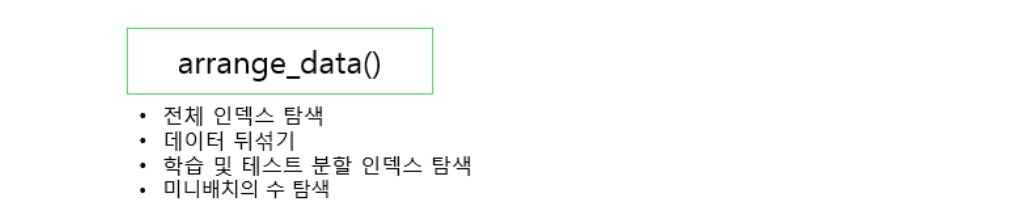

In [30]:
mb_size = 10
train_ratio = 0.8
print(data.shape)

(4, 11)


In [31]:
def arrange_data(mb_size, train_ratio):
    
    global shuffle_map, test_begin_index

    shuffle_map = np.arange(data.shape[0])
    np.random.shuffle(shuffle_map)

    mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size
    test_begin_index = mini_batch_step_count * mb_size
    return mini_batch_step_count

In [32]:
mini_batch_step_count = arrange_data(mb_size = 10, train_ratio = 0.8)
print("mini_batch_step_count : ", mini_batch_step_count)
print("shuffle_map : ",shuffle_map[:2])
print("test_begin_index : ", test_begin_index)

mini_batch_step_count :  0
shuffle_map :  [0 1]
test_begin_index :  0


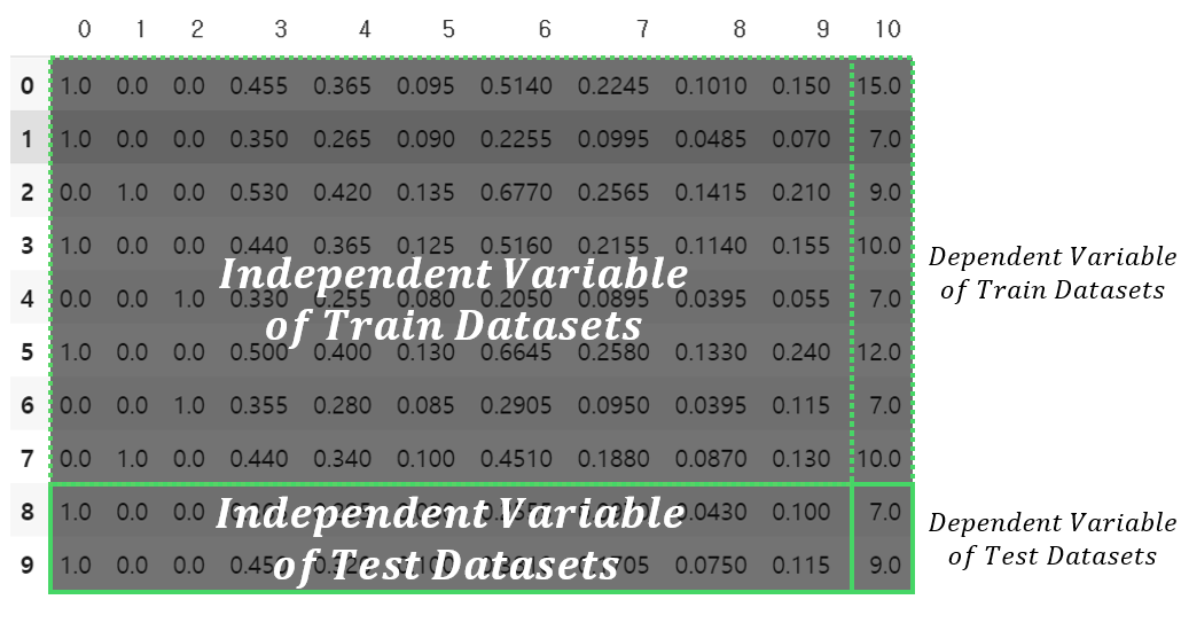

In [33]:
def get_test_data():
    test_data = data[shuffle_map[test_begin_index:]]
    return test_data[ : , : -output_cnt], test_data[ : , -output_cnt : ]

In [34]:
test_x, test_y = get_test_data()
print(test_x)
print("=========================")
print(test_y)

[[1.     0.     0.     0.35   0.265  0.09   0.2255 0.0995 0.0485 0.07  ]
 [0.     1.     0.     0.53   0.42   0.135  0.677  0.2565 0.1415 0.21  ]
 [1.     0.     0.     0.44   0.365  0.125  0.516  0.2155 0.114  0.155 ]
 [0.     0.     1.     0.33   0.255  0.08   0.205  0.0895 0.0395 0.055 ]]
[[ 7.]
 [ 9.]
 [10.]
 [ 7.]]


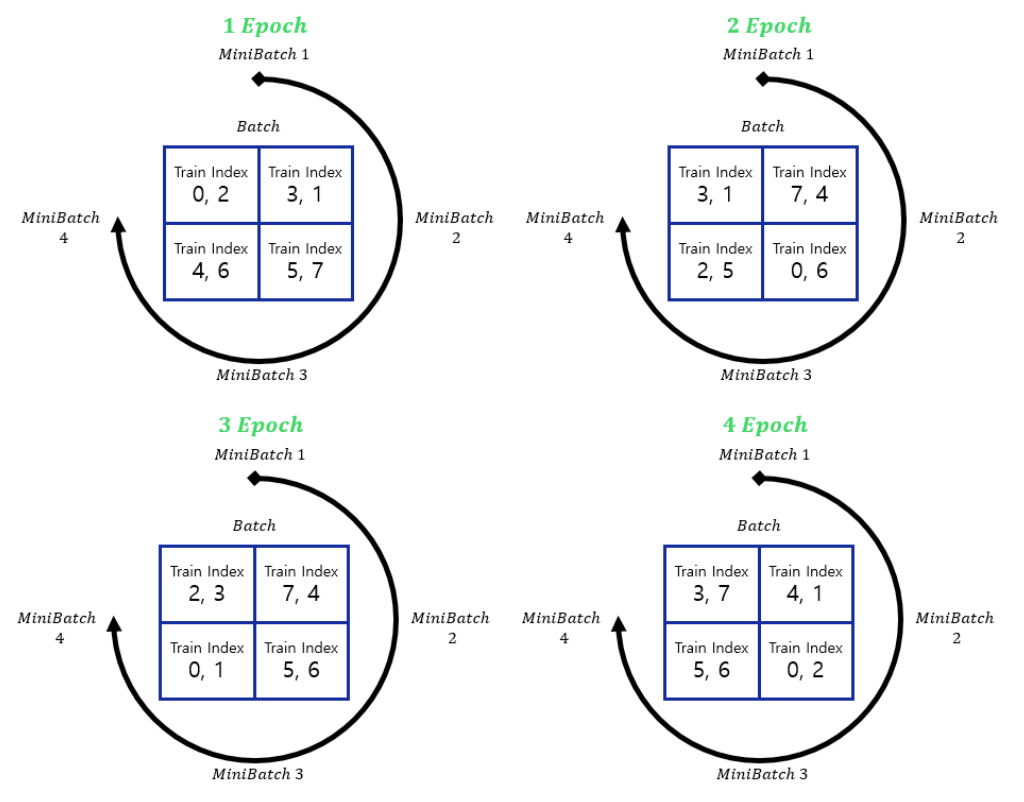

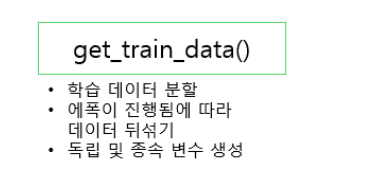

In [35]:
def get_train_data(mb_size, n):
    if n == 0:
        np.random.shuffle(shuffle_map[:test_begin_index])

    train_data = data[shuffle_map[mb_size * n : mb_size * (n+1) ]]

    return train_data[ : , : -output_cnt], train_data[ : , -output_cnt : ]

In [36]:
train_x, train_y = get_train_data(mb_size = 10, n = 0)
print(train_x)
print("=============================")
print(train_y)

[[1.     0.     0.     0.35   0.265  0.09   0.2255 0.0995 0.0485 0.07  ]
 [0.     1.     0.     0.53   0.42   0.135  0.677  0.2565 0.1415 0.21  ]
 [1.     0.     0.     0.44   0.365  0.125  0.516  0.2155 0.114  0.155 ]
 [0.     0.     1.     0.33   0.255  0.08   0.205  0.0895 0.0395 0.055 ]]
[[ 7.]
 [ 9.]
 [10.]
 [ 7.]]


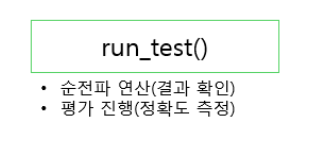

In [37]:
def run_test(x, y):
    accuracy = 100
    return accuracy
run_test(0,0)

100

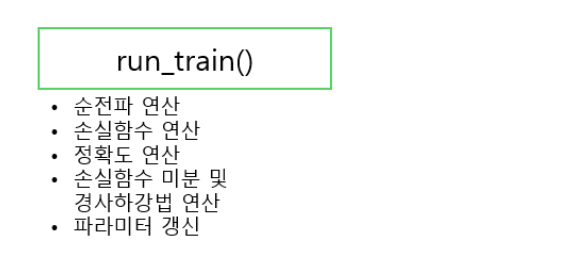

In [38]:
def run_train(x, y):
    loss = 0
    accuracy = 95
    return loss, accuracy
run_train(0,0)

(0, 95)

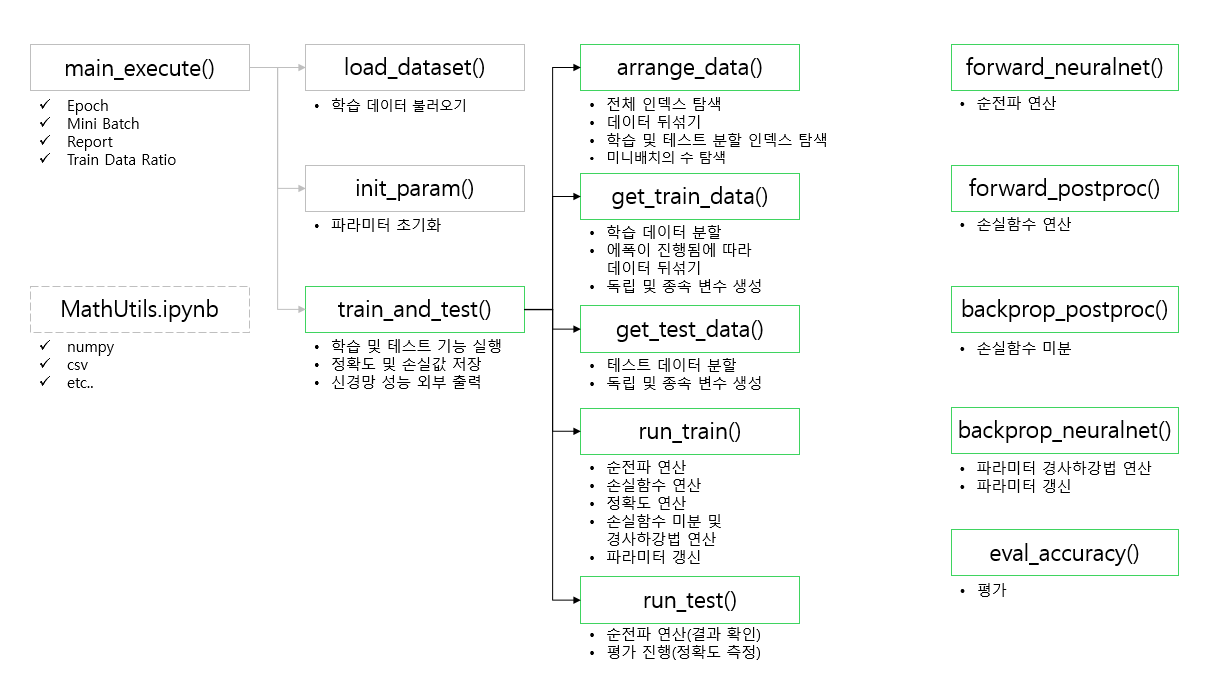

In [39]:
def train_and_test(epoch_count, mb_size, report, train_ratio):
    mini_batch_step_count = arrange_data(mb_size, train_ratio)
    test_x, test_y = get_test_data()

    losses_mean_row = []
    accs_mean_row   = []

    for epoch in range(epoch_count):
        losses = []
        accs   = [] 
        for n in range(mini_batch_step_count):
            train_x, train_y = get_train_data(mb_size, n)
            loss, acc = run_train(train_x, train_y)
            losses.append(loss)
            accs.append(acc)

        if report > 0 and (epoch + 1) % report == 0:
            acc = run_test(test_x, test_y)
            print("Epoch {} : Train - Loss = {:.3f}, Accuracy = {:.3f}  / Test - Accuracy = {:.3f}".\
                  format(epoch + 1, np.mean(losses), np.mean(accs), acc))
            
        losses_mean = np.mean(losses)
        accs_mean   = np.mean(accs) * 100

        losses_mean_row.append(losses_mean)
        accs_mean_row.append(accs_mean)

    final_acc = run_test(test_x, test_y)        
    print("=" * 30, "Final TEST", "=" * 30)
    print("\nFinal Accuracy : {:.3f}".format(final_acc))

    return losses_mean_row, accs_mean_row, final_acc


In [40]:
result = train_and_test(epoch_count = 10, 
                        mb_size = 10, 
                        report = 3,
                        train_ratio = 0.8)

Epoch 3 : Train - Loss = nan, Accuracy = nan  / Test - Accuracy = 100.000
Epoch 6 : Train - Loss = nan, Accuracy = nan  / Test - Accuracy = 100.000
Epoch 9 : Train - Loss = nan, Accuracy = nan  / Test - Accuracy = 100.000
============================== Final TEST ==============================

Final Accuracy : 100.000


C:\Users\KimYeonSang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\KimYeonSang\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


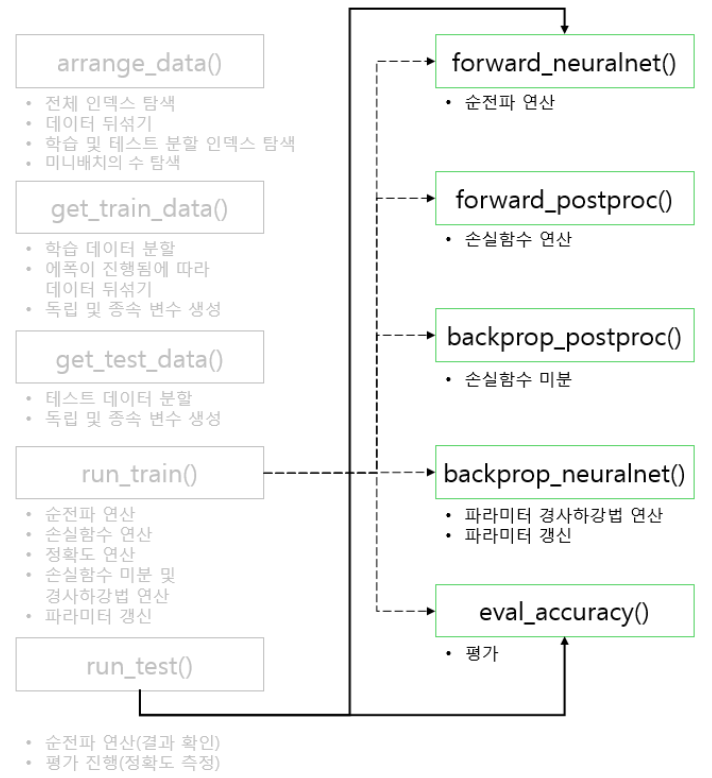

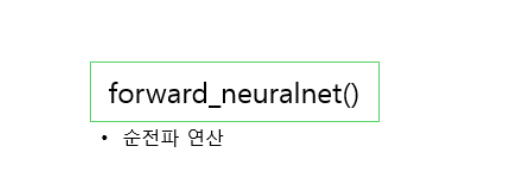

In [41]:
def forward_neuralnet(x):
    y_hat = np.matmul(x, weight) + bias 
    return y_hat, x

In [42]:
y_hat, _ = forward_neuralnet(train_x)
print("y_hat : \n", y_hat)
print(y_hat.shape)

y_hat : 
 [[0.00300053]
 [0.04737532]
 [0.01472066]
 [0.04300514]]
(4, 1)


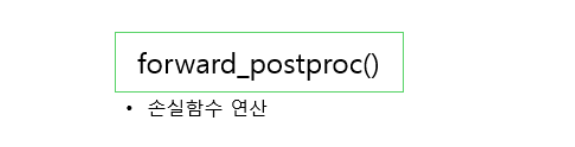

In [43]:
def forward_postproc(y_hat, y):
    diff   = y_hat - y
    square = np.square(diff)
    loss   = np.mean(square)

    return loss, diff

In [44]:
train_y

array([[ 7.],
       [ 9.],
       [10.],
       [ 7.]])

In [45]:
loss, _ = forward_postproc(y_hat, train_y)
print(loss)

69.30326779869347


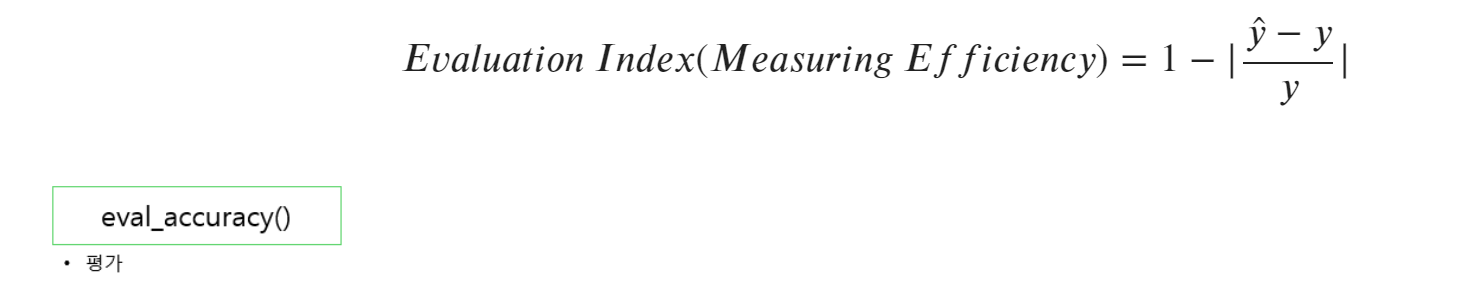

In [46]:
def eval_accuracy(y_hat, y):
    mdiff = np.mean(np.abs((y_hat - y) / y))
    return 1 - mdiff 

In [47]:
acc = eval_accuracy(y_hat, train_y)
print("Acc : {} ".format(np.round(acc * 100,3)))

Acc : 0.333 


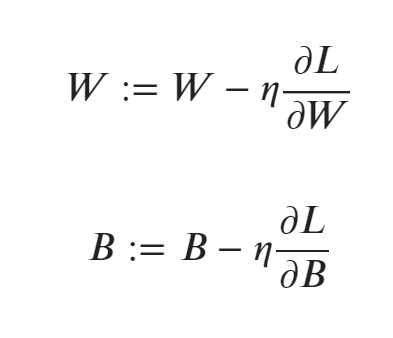

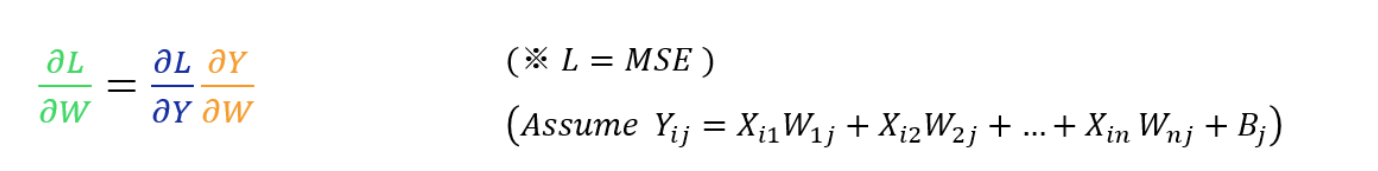

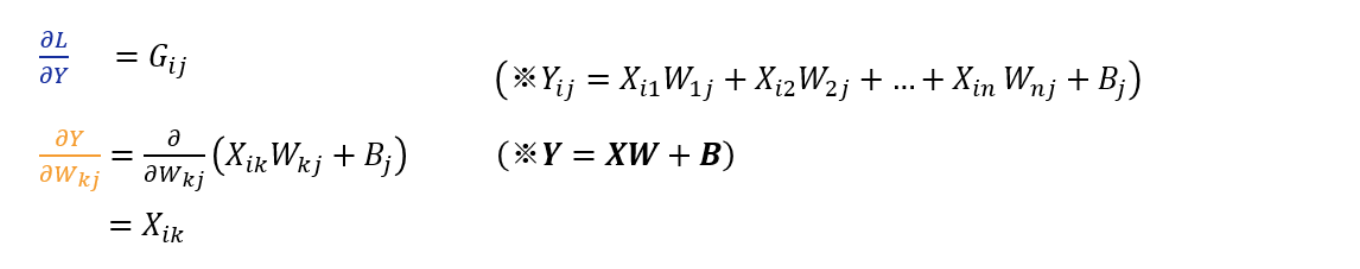

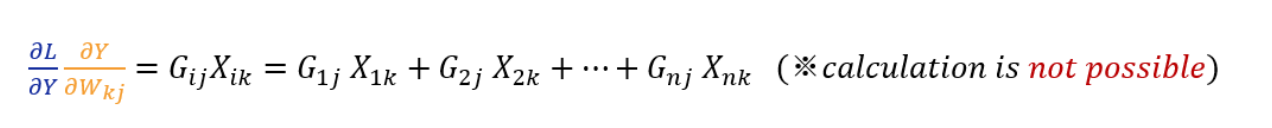

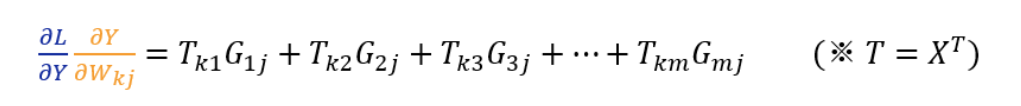

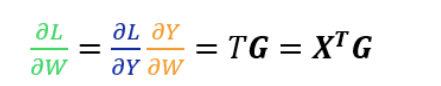

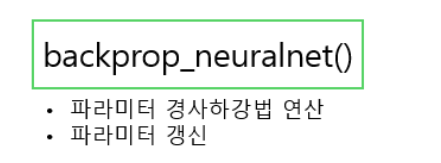

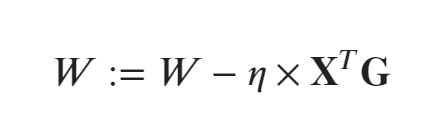

In [48]:
def backprop_neuralnet(G_output, x):
    global weight, bias 

    x_transpose = x.transpose()
    G_w = np.matmul(x_transpose, G_output)

    G_b = np.sum(G_output, axis = 0)

    weight -= LEARNING_RATE * G_w
    bias   -= LEARNING_RATE * G_b

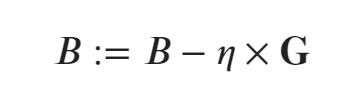

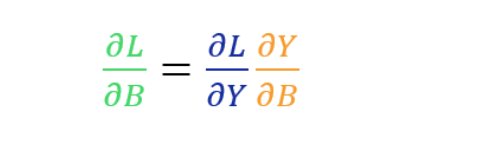

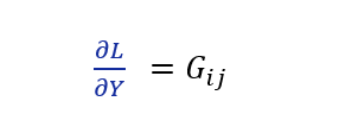

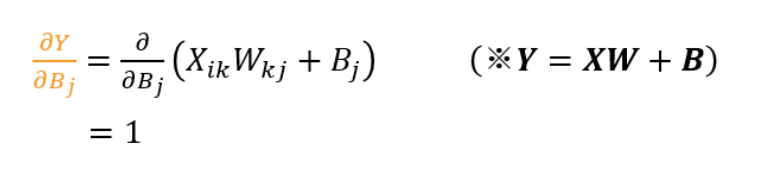

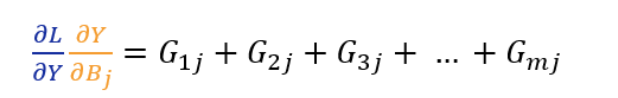

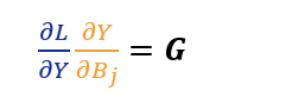

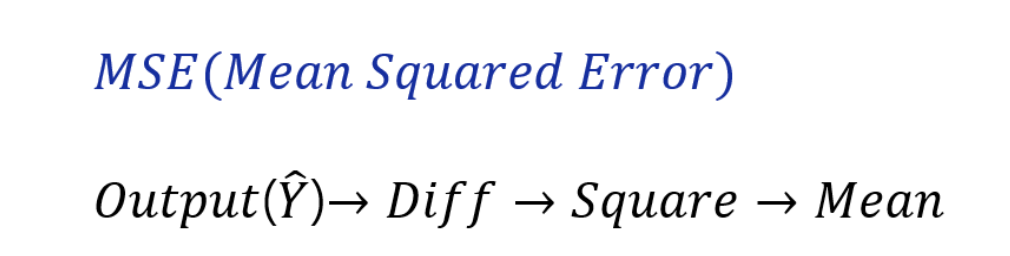

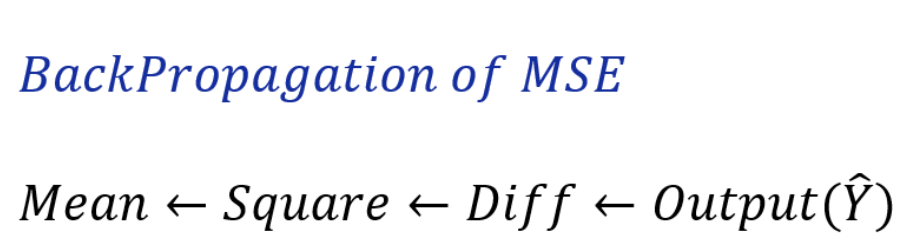

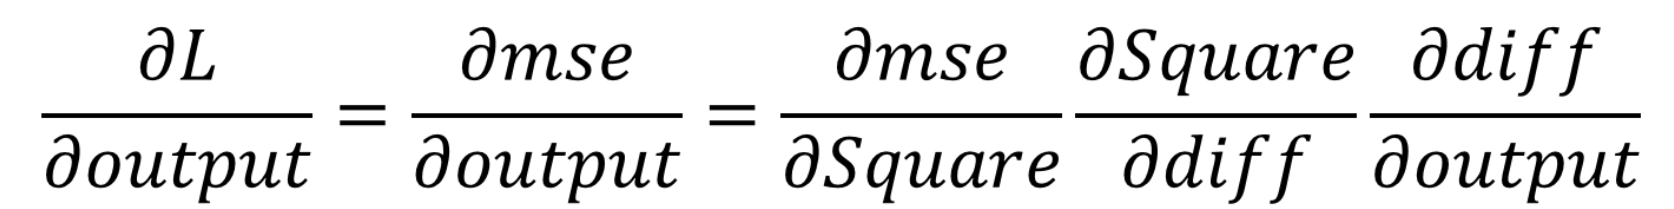

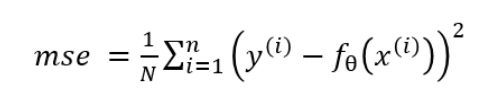

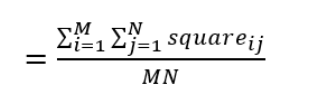

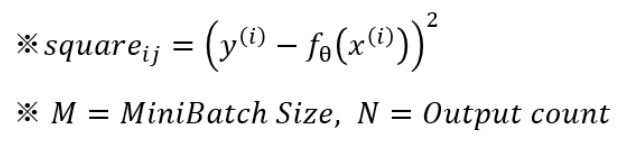

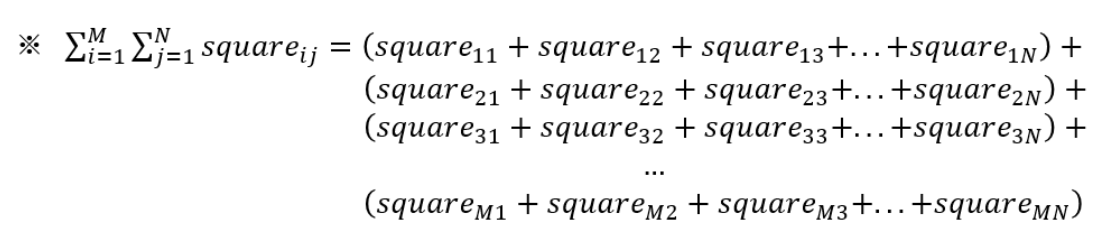

In [49]:
diff = y_hat - train_y
print("diff.shape : ", diff.shape)

square = np.square(diff)
print("square : \n", square)

row_count_M = diff.shape[0]
col_count_N = diff.shape[1]

print("row_count_M : ", row_count_M)
print("col_count_N : ", col_count_N)

MSE =  (square[0][0] + square[0][1] 
        square[1][0] + square[1][1]
        square[2][0] + square[2][1]
        square[3][0] + 
        square[4][0] + 
        square[5][0] + 
        square[6][0] + 
        square[7][0] + 
        square[8][0] + 
        square[9][0]) / (row_count_M * col_count_N)
print("MSE : ", MSE)

SyntaxError: invalid syntax (<ipython-input-49-406eba148790>, line 14)

In [ ]:
print(square[0][0])
print(square[1][0])
print(square[2][0])

48.769246257663646
80.86520190880833
49.50810717514164


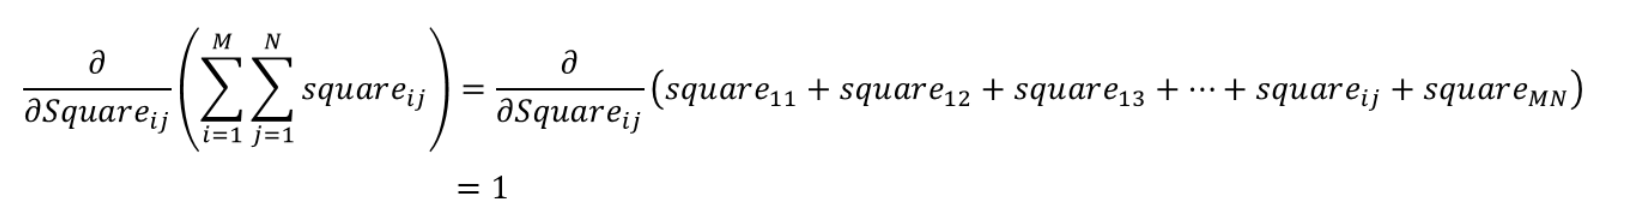

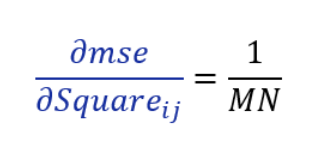

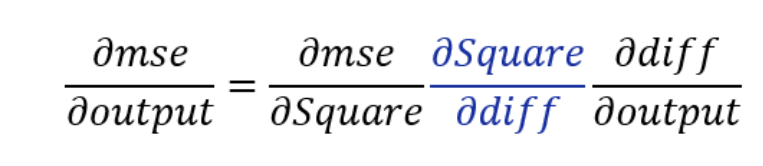

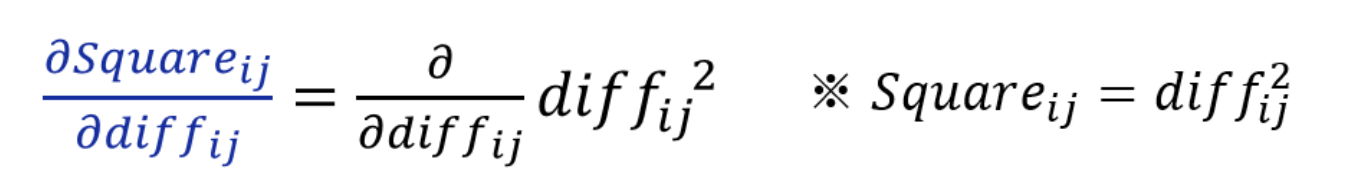

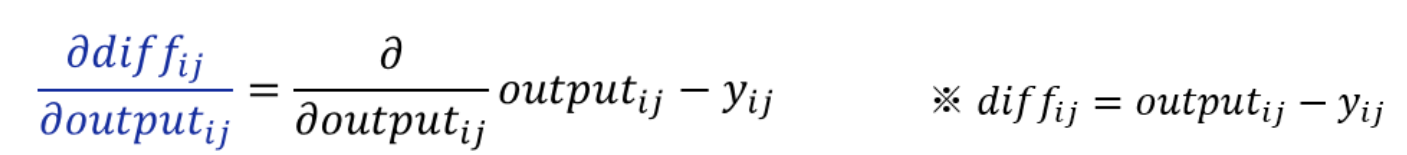

In [ ]:
def backprop_postproc(diff):
    M_N = diff.shape

    g_mse_square  = np.ones(M_N) / np.prod(M_N)
    g_square_diff = 2 * diff
    g_diff_output = 1 

    G_diff   = g_mse_square * g_square_diff 
    G_output = g_diff_output * G_diff

    return G_output

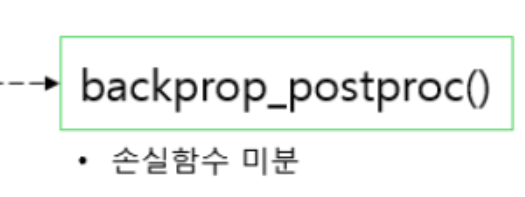

In [ ]:
def run_train(x, y):
    y_hat, aux_nn_x   = forward_neuralnet(x)
    loss, aux_pp_diff = forward_postproc(y_hat, y)

    accuracy = eval_accuracy(y_hat, y)

    G_output = backprop_postproc(aux_pp_diff)
    backprop_neuralnet(G_output, aux_nn_x)

    return loss, accuracy

In [ ]:
def run_test(x, y):
    y_hat, _  = forward_neuralnet(x)
    accuracy = eval_accuracy(y_hat, y)

    return accuracy

In [ ]:
weight_initial, bias_initial, losses_mean_row, accs_mean_row, final_acc = main_execute(epoch_count = 10, 
                                                                                       mb_size = 32, 
                                                                                       report = 1, 
                                                                                       train_ratio = 0.8)

Initial Weight Value : 
[[ 0.00491463]
 [ 0.0434672 ]
 [ 0.00460659]
 [ 0.00354479]
 [-0.00798313]
 [-0.04313968]
 [-0.04348028]
 [ 0.00771045]
 [-0.00989948]
 [-0.07102921]]
Initial Bias Value : 
[0.]
Epoch 1 : Train - Loss = 8.833, Accuracy = 0.798  / Test - Accuracy = 0.813
Epoch 2 : Train - Loss = 6.707, Accuracy = 0.809  / Test - Accuracy = 0.818
Epoch 3 : Train - Loss = 6.501, Accuracy = 0.812  / Test - Accuracy = 0.806
Epoch 4 : Train - Loss = 6.359, Accuracy = 0.815  / Test - Accuracy = 0.795
Epoch 5 : Train - Loss = 6.192, Accuracy = 0.816  / Test - Accuracy = 0.816
Epoch 6 : Train - Loss = 6.113, Accuracy = 0.818  / Test - Accuracy = 0.822
Epoch 7 : Train - Loss = 5.957, Accuracy = 0.821  / Test - Accuracy = 0.815
Epoch 8 : Train - Loss = 5.883, Accuracy = 0.822  / Test - Accuracy = 0.840
Epoch 9 : Train - Loss = 5.779, Accuracy = 0.824  / Test - Accuracy = 0.831
Epoch 10 : Train - Loss = 5.668, Accuracy = 0.826  / Test - Accuracy = 0.842
============================== Final 

In [ ]:
print("weight \n", weight)
print("bias \n", bias)

weight 
 [[ 1.66001361]
 [ 1.6782759 ]
 [ 0.60091632]
 [ 3.34061328]
 [ 3.22550923]
 [ 1.87504605]
 [ 2.66038914]
 [-6.75789251]
 [-0.50181542]
 [ 5.89089499]]
bias 
 [3.88621742]


In [ ]:
new_x = [0, 1, 0, 0.685, 0.545, 0.18, 1.42, 0.674, 0.392, 0.5]

y_pred = forward_neuralnet(new_x)
print("y_pred: ", y_pred[0])

y_pred:  [11.91989311]


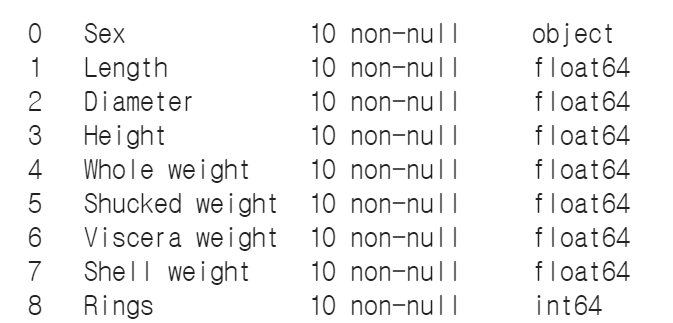

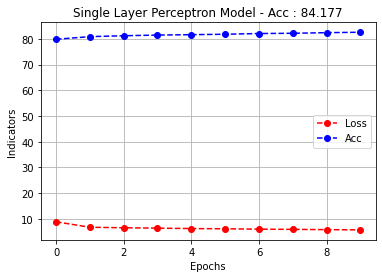

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses_mean_row, '--o', color = 'red', label = 'Loss')
plt.plot(accs_mean_row, '--o', color = 'blue', label = 'Acc')

plt.title("Single Layer Perceptron Model - Acc : {:.3f}".\
          format(final_acc * 100))

plt.xlabel('Epochs')
plt.ylabel('Indicators')
plt.grid()
plt.legend()
plt.show()

In [ ]:
losses_mean_row, accs_mean_row, final_acc

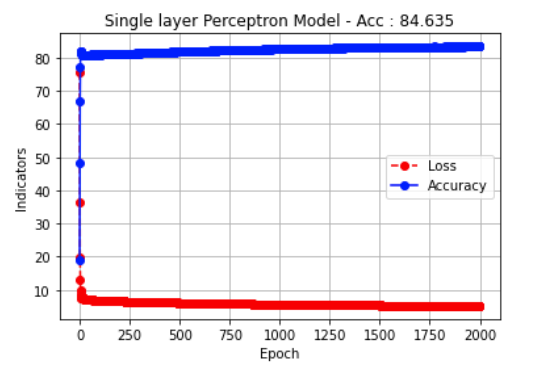

# 최종 출력 디자인 

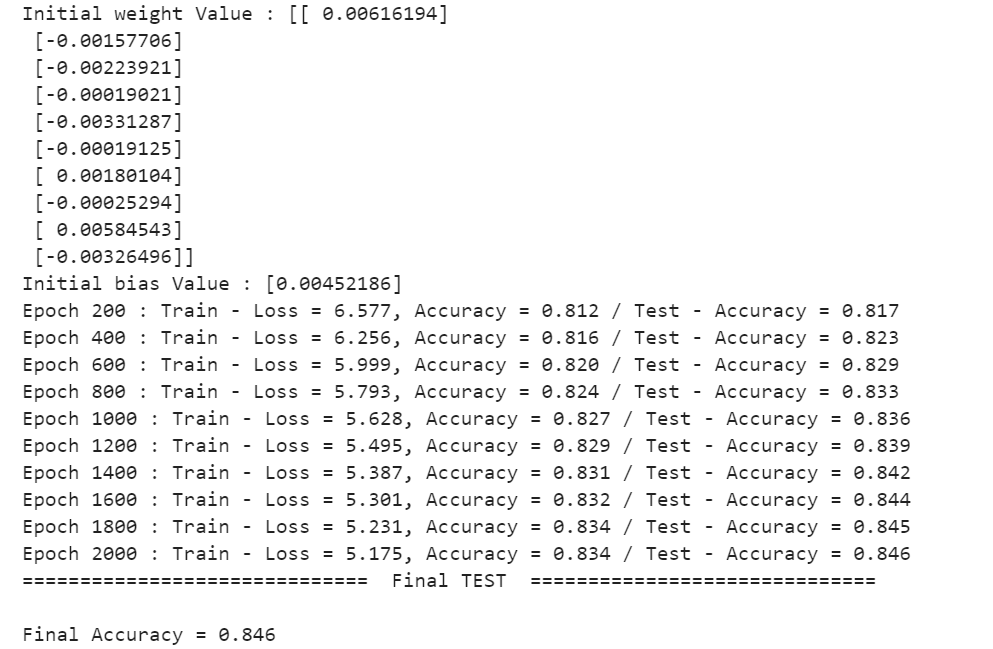

In [ ]:
%run MathUtils.ipynb

In [50]:
%run abalone_model.ipynb

Exception: File `'/content/MathUtils.ipynb.py'` not found.

Exception: File `'/content/MathUtils.ipynb.py'` not found.

In [ ]:
weight_initial, bias_initial, losses_mean_row, accs_mean_row, final_acc = main_execute(epoch_count = 10, 
                                                                                       mb_size = 32, 
                                                                                       report = 1, 
                                                                                       train_ratio = 0.8)

Initial Weight Value : 
[[ 0.03179252]
 [ 0.0444084 ]
 [ 0.06572812]
 [-0.01447332]
 [ 0.02105204]
 [-0.01614663]
 [ 0.03800178]
 [-0.01673243]
 [ 0.02694492]
 [ 0.01138863]]
Initial Bias Value : 
[0.]
Epoch 1 : Train - Loss = 8.690, Accuracy = 0.797  / Test - Accuracy = 0.820
Epoch 2 : Train - Loss = 6.750, Accuracy = 0.810  / Test - Accuracy = 0.809
Epoch 3 : Train - Loss = 6.542, Accuracy = 0.812  / Test - Accuracy = 0.812
Epoch 4 : Train - Loss = 6.363, Accuracy = 0.815  / Test - Accuracy = 0.819
Epoch 5 : Train - Loss = 6.239, Accuracy = 0.817  / Test - Accuracy = 0.836
Epoch 6 : Train - Loss = 6.122, Accuracy = 0.820  / Test - Accuracy = 0.826
Epoch 7 : Train - Loss = 5.985, Accuracy = 0.821  / Test - Accuracy = 0.833
Epoch 8 : Train - Loss = 5.863, Accuracy = 0.823  / Test - Accuracy = 0.841
Epoch 9 : Train - Loss = 5.806, Accuracy = 0.825  / Test - Accuracy = 0.822
Epoch 10 : Train - Loss = 5.703, Accuracy = 0.826  / Test - Accuracy = 0.813
============================== Final 